<a href="https://colab.research.google.com/github/jeshraghian/iscas-23-neuromorphic-tutorial/blob/main/ISCAS23_TinyOdin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2023 IEEE ISCAS - Hands-On with Sky130
## By Jason K. Eshraghian (www.ncg.ucsc.edu), Charlotte Frenkel & Farhad Modaresi

Run a few designs thru the [OpenLane](https://github.com/The-OpenROAD-Project/OpenLane/) GDS to RTL flow targeting the [open source SKY130 PDK](https://github.com/google/skywater-pdk/).

# Part 1: Basics
## Digital inverter with OpenLane


In [ ]:
#@title Install dependencies {display-mode: "form"}
#@markdown - Click the ▷ button to setup the digital design environment based on [conda-eda](https://github.com/hdl/conda-eda).

openlane_version = 'latest' #@param {type:"string"}
open_pdks_version = 'latest' #@param {type:"string"}

if openlane_version == 'latest':
  openlane_version = ''
if open_pdks_version == 'latest':
  open_pdks_version = ''

import os
import pathlib

!curl -Ls https://micro.mamba.pm/api/micromamba/linux-64/latest | tar -xj bin/micromamba
conda_prefix_path = pathlib.Path('conda-env')
CONDA_PREFIX = str(conda_prefix_path.resolve())
!bin/micromamba create --yes --prefix $CONDA_PREFIX
!echo 'python ==3.7*' >> {CONDA_PREFIX}/conda-meta/pinned
!CI=0 bin/micromamba install --yes --prefix $CONDA_PREFIX \
                     --channel litex-hub \
                     --channel main \
                     openlane={openlane_version} \
                     open_pdks.sky130a={open_pdks_version}
!python -m pip install gdstk gdstk cairosvg
PATH = os.environ['PATH']
%env CONDA_PREFIX={CONDA_PREFIX}
%env PATH={CONDA_PREFIX}/bin:{PATH}



                                           __
          __  ______ ___  ____ _____ ___  / /_  ____ _
         / / / / __ `__ \/ __ `/ __ `__ \/ __ \/ __ `/
        / /_/ / / / / / / /_/ / / / / / / /_/ / /_/ /
       / .___/_/ /_/ /_/\__,_/_/ /_/ /_/_.___/\__,_/
      /_/

Empty environment created at prefix: /content/conda-env

                                           __
          __  ______ ___  ____ _____ ___  / /_  ____ _
         / / / / __ `__ \/ __ `/ __ `__ \/ __ \/ __ `/
        / /_/ / / / / / / /_/ / / / / / / /_/ / /_/ /
       / .___/_/ /_/ /_/\__,_/_/ /_/ /_/_.___/\__,_/
      /_/


Pinned packages:
  - python 3.7*


Transaction

  Prefix: /content/conda-env

  Updating specs:

   - openlane=*
   - open_pdks.sky130a=*


  Package                              Version  Build                 Channel        Size
───────────────────────────────────────────────────────────────────────────────────────────
  Install:
────────────────────────────────────────────────────────────

## Start with a simple inverter

In [20]:
%%writefile inverter.v
module inverter(input wire in, output wire out);
    assign out = !in;
endmodule

Overwriting inverter.v


## Write configuration

[Documentation](https://openlane.readthedocs.io/en/latest/reference/configuration.html)

In [21]:
%%writefile config.json
{
    "DESIGN_NAME": "inverter",
    "VERILOG_FILES": "dir::inverter.v",
    "CLOCK_TREE_SYNTH": false,
    "CLOCK_PORT": null,
    "PL_RANDOM_GLB_PLACEMENT": true,
    "FP_SIZING": "absolute",
    "DIE_AREA": "0 0 34.5 57.12",
    "PL_TARGET_DENSITY": 0.75,
    "FP_PDN_AUTO_ADJUST": false,
    "FP_PDN_VPITCH": 25,
    "FP_PDN_HPITCH": 25,
    "FP_PDN_VOFFSET": 5,
    "FP_PDN_HOFFSET": 5,
    "DIODE_INSERTION_STRATEGY": 3
}

Overwriting config.json


## Run OpenLane Flow

[OpenLane](https://openlane.readthedocs.io/en/latest/) is an automated [RTL](https://en.wikipedia.org/wiki/Register-transfer_level) to [GDSII](https://en.wikipedia.org/wiki/GDSII) flow based on several components including [OpenROAD](https://theopenroadproject.org/), [Yosys](https://yosyshq.net/yosys/), [Magic](http://www.opencircuitdesign.com/magic/), [Netgen](http://opencircuitdesign.com/netgen/) and custom methodology scripts for design exploration and optimization targeting [open source PDKs](https://github.com/google/open-source-pdks).

![img](https://openlane.readthedocs.io/en/latest/_images/flow_v1.png)

In [22]:
%env PDK=sky130A
!flow.tcl -design .

env: PDK=sky130A
OpenLane 2023.04.12_0_g23e367a9-conda
All rights reserved. (c) 2020-2022 Efabless Corporation and contributors.
Available under the Apache License, version 2.0. See the LICENSE file for more details.

[INFO]: Using configuration in 'config.json'...
[INFO]: PDK Root: /content/conda-env/share/pdk
[INFO]: Process Design Kit: sky130A
[INFO]: Standard Cell Library: sky130_fd_sc_hd
[INFO]: Optimization Standard Cell Library: sky130_fd_sc_hd
[WARNING]: DIODE_INSERTION_STRATEGY is now deprecated; use GRT_REPAIR_ANTENNAS, DIODE_ON_PORTS and RUN_HEURISTIC_DIODE_INSERTION instead.
[INFO]: DIODE_INSERTION_STRATEGY set to 3. Setting GRT_REPAIR_ANTENNAS to 1
[INFO]: Run Directory: /content/runs/RUN_2023.05.21_17.59.47
[INFO]: Preparing LEF files for the nom corner...
[INFO]: Preparing LEF files for the min corner...
[INFO]: Preparing LEF files for the max corner...
[STEP 1]
[INFO]: Running Synthesis (log: runs/RUN_2023.05.21_17.59.47/logs/synthesis/1-synthesis.log)...
[STEP 2]
[INFO

# Display Layout

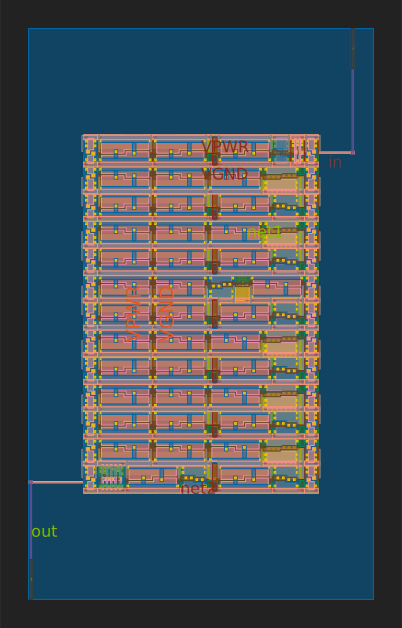

In [ ]:
import pathlib
import gdstk
import IPython.display

gdss = sorted(pathlib.Path('runs').glob('*/results/final/gds/*.gds'))
library = gdstk.read_gds(gdss[-1])
top_cells = library.top_level()
top_cells[0].write_svg('inverter.svg')
IPython.display.SVG('inverter.svg')

## Display metrics

In [ ]:
import pandas as pd
import pathlib

pd.options.display.max_rows = None
reports = sorted(pathlib.Path('runs').glob('*/reports/metrics.csv'))
df = pd.read_csv(reports[-1])
df.transpose()

# 2. A Digital Spiking Neuron

In [ ]:
%%writefile leaky.v
module leaky (
    input wire               clk,
    input wire               reset,
    input wire [7:0]         post_synaptic,
    output reg               spike
);

    reg  [7:0] state, threshold;
    wire [7:0] state_hist;

    assign state_hist = post_synaptic + (spike ? 0 : (state >> 1)); // scale by 1/2

    always @(posedge clk) begin
        if (reset) begin
            threshold <= 128;
            state <= 0;
            spike <= 0;
        end else begin
            state <= state_hist;
            spike <= (state >= threshold);

        end
    end

endmodule

Overwriting leaky.v


In [ ]:
!rm -r config.json

In [ ]:
%%writefile config.json

{
    "DESIGN_NAME": "leaky",
    "VERILOG_FILES": "dir::leaky.v",
    "CLOCK_PORT": "CLK",
    "ROUTING_CORES": 32,
    "RUN_KLAYOUT_XOR": 0,
    "RUN_KLAYOUT_DRC": 0,
    "CLOCK_PERIOD": 20.0,
    "FP_SIZING": "absolute",
    "DIE_AREA": "0 0 800 800",
    "PL_TARGET_DENSITY": 0.3,
    "DESIGN_IS_CORE": true
}

Writing config.json


In [ ]:
%env PDK=sky130A
! rm -rf runs/
!flow.tcl -design .

env: PDK=sky130A
OpenLane 2023.04.12_0_g23e367a9-conda
All rights reserved. (c) 2020-2022 Efabless Corporation and contributors.
Available under the Apache License, version 2.0. See the LICENSE file for more details.

[INFO]: Using configuration in 'config.json'...
[INFO]: PDK Root: /content/conda-env/share/pdk
[INFO]: Process Design Kit: sky130A
[INFO]: Standard Cell Library: sky130_fd_sc_hd
[INFO]: Optimization Standard Cell Library: sky130_fd_sc_hd
[INFO]: Run Directory: /content/runs/RUN_2023.05.21_17.46.00
[INFO]: Preparing LEF files for the nom corner...
[INFO]: Preparing LEF files for the min corner...
[INFO]: Preparing LEF files for the max corner...
[STEP 1]
[INFO]: Running Synthesis (log: runs/RUN_2023.05.21_17.46.00/logs/synthesis/1-synthesis.log)...
[STEP 2]
[INFO]: Running Single-Corner Static Timing Analysis (log: runs/RUN_2023.05.21_17.46.00/logs/synthesis/2-sta.log)...
[STEP 3]
[INFO]: Running Initial Floorplanning (log: runs/RUN_2023.05.21_17.46.00/logs/floorplan/3-ini

# More Pretty Pictures

In [ ]:
gdss = sorted(pathlib.Path('runs').glob('*/results/final/gds/*.gds'))
library = gdstk.read_gds(gdss[-1])
top_cells = library.top_level()
top_cells[0].write_svg('lneuron.svg')
IPython.display.SVG('lif-neuron.svg')

# 3. TinyODin
TinyOdin: https://github.com/ChFrenkel/tinyODIN
by Charlotte Frenkel

*Note: memories have been omitted in this repo*

In [ ]:
! pwd && ls
! rm -rf tinyODIN/
! git clone https://github.com/sfmth/tinyODIN

/content
bin  conda-env	sample_data
Cloning into 'tinyODIN'...
remote: Enumerating objects: 32, done.
remote: Counting objects: 100% (32/32), done.
remote: Compressing objects: 100% (28/28), done.
remote: Total 32 (delta 8), reused 9 (delta 4), pack-reused 0
Unpacking objects: 100% (32/32), 202.83 KiB | 7.51 MiB/s, done.


## Write configuration

[Documentation](https://openlane.readthedocs.io/en/latest/reference/configuration.html)

In [ ]:
%%writefile config.json
{
    "DESIGN_NAME": "tinyODIN",
    "VERILOG_FILES": "dir::tinyODIN/*.v",
    "CLOCK_PORT": "CLK",
    "ROUTING_CORES": 32,
    "RUN_KLAYOUT_XOR": 0,
    "RUN_KLAYOUT_DRC": 0,
    "CLOCK_PERIOD": 20.0,
    "FP_SIZING": "absolute",
    "DIE_AREA": "0 0 800 800",
    "PL_TARGET_DENSITY": 0.3,
    "DESIGN_IS_CORE": true
}

Writing config.json


In [ ]:
%env PDK=sky130A
! rm -rf runs/
!flow.tcl -design .

env: PDK=sky130A
OpenLane 2023.04.12_0_g23e367a9-conda
All rights reserved. (c) 2020-2022 Efabless Corporation and contributors.
Available under the Apache License, version 2.0. See the LICENSE file for more details.

[INFO]: Using configuration in 'config.json'...
[INFO]: PDK Root: /content/conda-env/share/pdk
[INFO]: Process Design Kit: sky130A
[INFO]: Standard Cell Library: sky130_fd_sc_hd
[INFO]: Optimization Standard Cell Library: sky130_fd_sc_hd
[INFO]: Run Directory: /content/runs/RUN_2023.05.19_13.30.54
[INFO]: Preparing LEF files for the nom corner...
[INFO]: Preparing LEF files for the min corner...
[INFO]: Preparing LEF files for the max corner...
[STEP 1]
[INFO]: Running Synthesis (log: runs/RUN_2023.05.19_13.30.54/logs/synthesis/1-synthesis.log)...
[STEP 2]
[INFO]: Running Single-Corner Static Timing Analysis (log: runs/RUN_2023.05.19_13.30.54/logs/synthesis/2-sta.log)...
[STEP 3]
[INFO]: Running Initial Floorplanning (log: runs/RUN_2023.05.19_13.30.54/logs/floorplan/3-ini

In [ ]:
# cd runs/*/reports/signoff && ls
! cd runs/*/reports/signoff/ && cat *.worst_slack.rpt
! cd runs/*/reports/signoff/ && cat *.power.rpt
! cd runs/*/reports/signoff/ && cat *.clock_skew.rpt


 report_worst_slack -max (Setup)
worst slack 3.79

 report_worst_slack -min (Hold)
worst slack 0.13

 report_power

======================= Typical Corner ===================================

Group                  Internal  Switching    Leakage      Total
                          Power      Power      Power      Power (Watts)
----------------------------------------------------------------
Sequential             3.54e-03   3.86e-04   1.50e-08   3.93e-03  31.1%
Combinational          3.62e-03   5.08e-03   6.65e-08   8.71e-03  68.9%
Macro                  0.00e+00   0.00e+00   0.00e+00   0.00e+00   0.0%
Pad                    0.00e+00   0.00e+00   0.00e+00   0.00e+00   0.0%
----------------------------------------------------------------
Total                  7.16e-03   5.47e-03   8.16e-08   1.26e-02 100.0%
                          56.7%      43.3%       0.0%

 report_clock_skew

======================= Typical Corner ===================================

Clock CLK
Latency      CRPR 

## Display layout

In [ ]:
! cd runs/*/results/final/gds && ls
! pwd

tinyODIN.gds
/content


In [ ]:
! pip install gdstk
! pip install  cairosvg
! conda install cairosvg
! python -m pip install cairosvg

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 820.8/820.8 kB 34.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 47.6 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached CairoSVG-2.7.0-py3-none-any.whl (43 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 58.5 MB/s eta 0:00:00
  Using cached cairocffi-1.5.1.tar.gz (86 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached cssselect2-0.7.0-py3-none-any.whl (15 kB)
  Using cached cffi-1.15.1-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (427 kB)
  Using cached pycparser-2.21-py2.py3-none-any.whl (118 kB)
  Created wheel for cairocffi: filename=cairocffi-1.5.1-py3-none-any.wh

/bin/bash: conda: command not found
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
! pip install CairoSVG==2.7.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
! pip list -v | grep Cairo

CairoSVG           2.7.0     /content/conda-env/lib/python3.7/site-packages pip


In [ ]:
import gdstk
import cairosvg
from IPython.display import Image
def gds2d_view(gds_file, scale=10):
  svg = gds_file.split(".")[0] + ".svg"
  png = gds_file.split(".")[0] + ".png"
  library = gdstk.read_gds(gds_file)
  top_cells = library.top_level()
  top_cells[0].write_svg(svg)
  cairosvg.svg2png(url=svg, write_to=png, scale=scale)
  return Image(png)

In [ ]:
! rm *.png
! rm *.svg
gdss = sorted(pathlib.Path('runs').glob('*/results/final/gds/*.gds'))
gds2d_view(gdss, 1)

rm: cannot remove '*.png': No such file or directory
rm: cannot remove '*.svg': No such file or directory


AttributeError: ignored

In [ ]:
import pathlib
import gdstk
import IPython.display

! rm *.svg
gdss = sorted(pathlib.Path('runs').glob('*/results/final/gds/*.gds'))
print(gdss)
library = gdstk.read_gds(gdss[-1])
top_cells = library.top_level()
top_cells[0].write_svg('inverter.svg')
IPython.display.SVG('inverter.svg')

In [ ]:
from google.colab import files
# files.download('runs/RUN_2023.05.18_21.44.10/results/final/gds/tinyODIN.gds') 

## Metrics

[Documentation](https://openlane.readthedocs.io/en/latest/reference/datapoint_definitions.html)


In [ ]:
import pandas as pd
import pathlib

pd.options.display.max_rows = None
reports = sorted(pathlib.Path('runs').glob('*/reports/metrics.csv'))
df = pd.read_csv(reports[-1])
df.transpose()